## Two connected neurons
* https://nest-simulator.readthedocs.io/en/latest/tutorials/pynest_tutorial/part_1_neurons_and_simple_neural_networks.html#connecting-nodes-with-specific-connections


In [1]:
import nest
import matplotlib.pyplot as plt


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.8.0
 Built: Aug 27 2024 04:33:06

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
neuron1 = nest.Create("iaf_psc_alpha")
neuron1.set(I_e=376.0)
neuron2 = nest.Create("iaf_psc_alpha")
multimeter = nest.Create("multimeter")
multimeter.set(record_from=["V_m"])

In [3]:
nest.Connect(neuron1, neuron2, syn_spec = {"weight":20.0})
nest.Connect(multimeter, neuron1)
nest.Connect(multimeter, neuron2)


In [4]:
nest.Simulate(1000.0)


Oct 01 06:42:12 NodeManager::prepare_nodes [Info]: 
    Preparing 3 nodes for simulation.

Oct 01 06:42:12 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 3
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Not using MPI

Oct 01 06:42:12 SimulationManager::run [Info]: 
    Simulation finished.


In [5]:
dmm = multimeter.get()

In [6]:
vm1 = dmm['events']['V_m'][::2]
times1 = dmm['events']['times'][::2]
vm2 = dmm['events']['V_m'][1::2]
times2 = dmm['events']['times'][1::2]

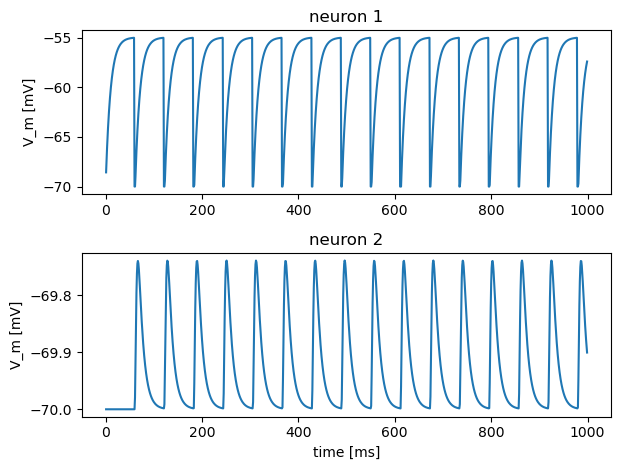

In [9]:
plt.subplot(2, 1, 1)
plt.plot(times1, vm1)
plt.title('neuron 1')
plt.ylabel('V_m [mV]')
plt.subplot(2, 1, 2)
plt.plot(times2, vm2)
plt.title('neuron 2')
plt.xlabel('time [ms]')
plt.ylabel('V_m [mV]')
plt.tight_layout()